In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip '/content/drive/My Drive/dataset/Quick_Draw.zip'

Archive:  /content/drive/My Drive/dataset/Quick_Draw.zip
replace data/full_numpy_bitmap_apple.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/full_numpy_bitmap_apple.npy  
  inflating: data/full_numpy_bitmap_bowtie.npy  
  inflating: data/full_numpy_bitmap_candle.npy  
  inflating: data/full_numpy_bitmap_door.npy  
  inflating: data/full_numpy_bitmap_envelope.npy  
  inflating: data/full_numpy_bitmap_fish.npy  
  inflating: data/full_numpy_bitmap_guitar.npy  
  inflating: data/full_numpy_bitmap_ice cream.npy  
  inflating: data/full_numpy_bitmap_lightning.npy  
  inflating: data/full_numpy_bitmap_moon.npy  
  inflating: data/full_numpy_bitmap_mountain.npy  
  inflating: data/full_numpy_bitmap_star.npy  
  inflating: data/full_numpy_bitmap_tent.npy  
  inflating: data/full_numpy_bitmap_toothbrush.npy  
  inflating: data/full_numpy_bitmap_wristwatch.npy  


In [0]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf

In [2]:
!ls

data  drive  sample_data


In [0]:
categories = ['apple', 'bowtie', 'candle', 'door', 'envelope', 'fish', 'guitar', 'ice cream', 'lightning', 'moon', 'mountain', 'star', 'tent', 'toothbrush', 'wristwatch']
label_dict = {0:'apple', 1:'bowtie', 2:'candle', 3:'door', 4:'envelope', 5:'fish', 6:'guitar', 7:'ice cream', 8:'lightning', 9:'moon', 10:'mountain', 11:'star', 12:'tent', 13:'toothbrush', 14:'wristwatch'}
dataset = {}
i = 0
for filename in os.listdir('/content/data'):
  if filename.endswith(".npy"):
    val = np.load("/content/data/" + str(filename))
    val = val.astype('float32')/255
    dataset[categories[i]] = np.c_[val, i*np.ones(len(val))]
  i += 1
    

In [0]:
lst = []
for key, value in dataset.items():
    lst.append(value[:3000])
data = np.concatenate(lst)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models


In [0]:
from sklearn.model_selection import train_test_split
y = data[:,-1].astype('float32')
X = data[:,:784]

# Splitting each dataset into train/test splits
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [0]:
y_train_cnn = tf.keras.utils.to_categorical(y_train)
y_test_cnn = tf.keras.utils.to_categorical(y_test)

X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
s = X_train_cnn.shape

In [8]:
[(X_train_cnn[n].shape, y_train[n]) for n in range(10)]

[((28, 28, 1), 6.0),
 ((28, 28, 1), 14.0),
 ((28, 28, 1), 6.0),
 ((28, 28, 1), 7.0),
 ((28, 28, 1), 0.0),
 ((28, 28, 1), 9.0),
 ((28, 28, 1), 10.0),
 ((28, 28, 1), 4.0),
 ((28, 28, 1), 14.0),
 ((28, 28, 1), 11.0)]

In [9]:
# Create the Model ResNet 50 Model
from keras.applications.mobilenet import MobileNet
from keras.optimizers import Adam
from keras.layers import *
from keras.models import Model

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [10]:
from keras.layers import *
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(32,(2,2), activation= 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3), activation = 'relu'))

model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(15,activation = 'softmax'))
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_2 (Dense)              (None, 15)           

In [11]:
from keras import optimizers
adam = optimizers.adam(lr = 0.00001)

model.compile(optimizer=adam, loss = 'categorical_crossentropy', metrics = ['acc'])

In [12]:
hist = model.fit(X_train_cnn, y_train_cnn, validation_split=0.2, epochs=50, batch_size=64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 25200 samples, validate on 6300 samples
Epoch 1/50
25200/25200 [==============================] - 9s 374us/step - loss: 2.6782 - acc: 0.1272 - val_loss: 2.6403 - val_acc: 0.2284
Epoch 2/50
25200/25200 [==============================] - 2s 74us/step - loss: 2.5844 - acc: 0.3329 - val_loss: 2.5146 - val_acc: 0.4068
Epoch 3/50
25200/25200 [==============================] - 2s 74us/step - loss: 2.4107 - acc: 0.4417 - val_loss: 2.2939 - val_acc: 0.4535
Epoch 4/50
25200/25200 [==============================] - 2s 73us/step - loss: 2.1581 - acc: 0.4817 - val_loss: 2.0209 - val_acc: 0.4951
Epoch 5/50
25200/25200 [==============================] - 2s 74us/step - loss: 1.8940 - acc: 0.5303 - val_loss: 1.7779 - val_acc: 0.5530
Epoch 6/50
25200/25200 [==============================] - 2s 74us/step - loss: 1.6799 - acc: 0.5827 - val_loss: 1.5963 - val_acc: 0.5883
Epoch 7/50
25200/25200 [=========

In [13]:
pred = model.model.predict(X_test_cnn)

/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


In [14]:
model.model.evaluate(X_test_cnn,y_test_cnn)[1]

 3424/13500 [======>.......................] - ETA: 0s

/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


13500/13500 [==============================] - 1s 44us/step


0.7964444443914626

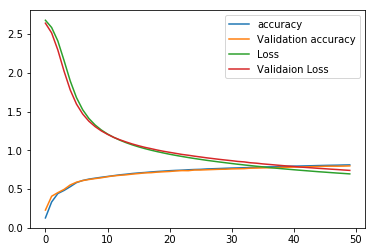

In [15]:
plt.plot(hist.history['acc'],label = 'accuracy')
plt.plot(hist.history['val_acc'],label = 'Validation accuracy')
plt.plot(hist.history['loss'],label = 'Loss')
plt.plot(hist.history['val_loss'],label = 'Validaion Loss')
plt.legend()
plt.show()